In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [96]:
def plot_scatter(df,col1,col2,regression_line = None):
    print(f'Correlation: {df[col1].corr(df[col2])}')

        
    plt.figure(figsize=(12,8))
    plt.xlabel(col1.replace('_',' '))
    plt.ylabel(col2.replace('_',' '))
    
    plt.scatter(df[col1],df[col2])
    plt.axhline(df[col2].mean(),color='r',linestyle='-',label='Mean')

    x,y = regression_line
    plt.plot(x,y,color='black',label='Regression line')
    plt.legend()
    plt.show()

I highly suggest watching [this video](https://www.coursera.org/learn/basic-statistics/lecture/TBC3a/2-05-regression-how-good-is-the-line) if you're confused, the lecturers have explained much better in detail:


In the previous correlation example, we have calculated the _Pearson's R_ to see if two variables are correlated, and their correlation strength. We have also plotted the regression line with the help of the R-value. To determine how accurate the regression line predicts, we can use the following measure:

$$\text{Accuracy} = r^2$$

Note that this is just the squared value of Pearson's R. It tells you how much better a regression line predicts the value of a dependent variable than the mean of the variable.

In [97]:
df = pd.read_csv('master.csv')
df[['population','gdp_per_year($)']]

,population,gdp_per_year($)
0,312900,"2,156,624,900"
1,308000,"2,156,624,900"
2,289700,"2,156,624,900"
3,21800,"2,156,624,900"
4,274300,"2,156,624,900"
...,...,...
27815,3620833,"63,067,077,179"
27816,348465,"63,067,077,179"
27817,2762158,"63,067,077,179"
27818,2631600,"63,067,077,179"


In [98]:
if df['gdp_per_year($)'].dtype != np.int64:
    df['gdp_per_year($)'] = df['gdp_per_year($)'].map(lambda x:int(x.replace(',','')))

In [99]:
# Regression line we have calculated from previous notebook
data_points = -41635113905.65863 + 264103.30041075265 * df['population']

Correlation: 0.7106973227934164


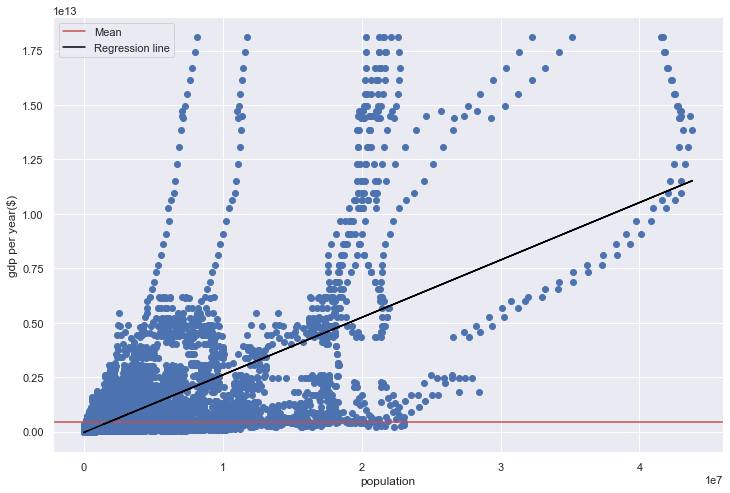

In [103]:
plot_scatter(df,'population','gdp_per_year($)',(df['population'],data_points))

As we can see, making predictions with the mean is very inaccurate. The distances between the residuals and the **regression line** is much smaller than that of the **mean** prediction.

In [101]:
# Calculate R squared
r_squared = 0.71 ** 2
print(f'R Squared: {r_squared}')

R Squared: 0.5041


In this case, we can say that the prediction error is about 50.41% smaller than when we use the mean to make predictions.

$R^2$ can also e interpreted as:

_The amount of variance in our dependent variable $y$ that is explained by our independent variable $x$._

Hence 50.41% of the variance in the _GDP per year_ can be predicted by the population.

Note that the interpretation between Pearson's R and $R^2$ is very different. The Pearon's R tells us whether the linear relationship between the two variables are positive and negative, which tells us the direction and strength of the relation. In contrast, $R^2$ does not tell us the direction of the relationship as it is **always positive**. 

$R^2$ tells us:

- How much better a regression line predicts your dependent variable than the mean of the variable
- How much of the variance in your dependent variable is explained by your independent variable